In [6]:
#this is a script for compiling data that has been fully parallelized on the cluster. 

import pandas as pd
import matplotlib.pyplot as plt
import string
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics
import paramiko
from paramiko import SSHClient
from scp import SCPClient



In [7]:

#user defined variables
JobIDint = 1557461
Clade = "squamate"
username = 'mchari'
min_size = 5
max_size = 600 
interval = 5



In [8]:
#Local variables: figure out how to automate the jobIDint feature. 

save_directory = os.getcwd() + '/'+ Clade + '/' 
os.makedirs(save_directory, exist_ok=True)
JOBID = str(JobIDint)
tree_sizes_1 = list(range(min_size,max_size,interval))
tree_sizes_2 = []
tree_sizes = tree_sizes_1 + tree_sizes_2
print(tree_sizes)
#tree_sizes = [10,25,50,75,100,350,500,700,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] # define the tree sizes that we have data for (aka: parameter combinations)
metric = 'mpd'
num_files = 1 #predetermine the number of files/runs. This is equivalent to the array_ID from the r script. 
transfer = True;

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595]


In [9]:
#establish connection with remote server and transfer files from filenam
#DO NOT RUN THIS UNLESS THE FILES HAVE NOT BEEN TRANSFERRED

if(transfer):
    hoffman2_path_output = '/u/home/m/' + username + '/bird/Parallel_Hoffman_full/' + Clade + '/'+ JOBID + '_output_files'
    print(hoffman2_path_output)
    ssh_ob = SSHClient()
    ssh_ob.load_system_host_keys()
    ssh_ob.connect('hoffman2.idre.ucla.edu', username = 'mchari', password= 'Xf4p4D24')
    scp = SCPClient(ssh_ob.get_transport())
    scp.get(hoffman2_path_output, recursive = True)
    print("transfer is done")
    transfer = False;
else:
    print("transfer already complete")
    
#set up local direrctory and establish folder as target

/u/home/m/mchari/bird/Parallel_Hoffman_full/squamate/1557461_output_files
transfer is done


In [10]:
cwd = os.getcwd()
target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"

In [ ]:
#for some reason, only went until 430 

In [97]:
print(target_directory)

/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/1405832_output_files/


In [11]:
# Create dictionary class

class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value


In [12]:

#right now the mean part of this function is redundant but I'm keeping it in just in case. 
#avg_mpd_rand = []

#choice of 2 statistics: mpd, mntd
def div_stats(tree_sizes, JobIDint, target_directory, target_statistic):
    dict_mpd = my_dictionary() #initialize new dictionary 
    
    #i don't know why i did it this way. can't remember. 
    if target_statistic == "mpd":
        target_val = 'mpd'
    elif target_statistic == "mntd":
        target_val = 'mntd'
    elif target_statistic == "pd":
        target_val = 'pd'
    else:
        print("error") #add an error
    for i in tree_sizes:
        size = str(i) #gets the i'th data. 
        count = 0
        mpd_sum = 0
        array_temp = []
        name = target_statistic + str(i)
        for file in os.listdir(target_directory): #search every file in the target directory. 
            if file.startswith(size + "_"):
                direct = target_directory + file #go to the directory
                temp_df = pd.read_csv(direct) #read in the csv. 
                temp_df.index =['pd', 'mpd', "mntd"]
                stat_temp = temp_df.loc[target_val]
                #mpd_sum = mpd_sum + temp_df.iloc[0][target_val]
                #count  = count + 1
                array_temp.extend(stat_temp)
        #average_mpd_rnd.append(mpd_sum/count)
        dict_mpd.add(name, array_temp)
    
    return dict_mpd
    
        #average_mpd_rnd.append(mpd.rand)




In [13]:
def remove_empty_values(dictionary):
    # Filter out key-value pairs where the values are not empty
    updated_dict = {key: value for key, value in dictionary.items() if value}

    return updated_dict

In [14]:
def extract_numbers(keys):
    numbers = [int(key[3:]) for key in keys]
    return numbers



In [15]:
#make dictionaries out of available data. 

new_mpd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mpd')
new_mntd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mntd')
new_pd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'pd')


In [16]:
new_mpd = remove_empty_values(new_mpd_smallvals)
new_mntd = remove_empty_values(new_mntd_smallvals)
new_pd = remove_empty_values(new_pd_smallvals)
tree_sizes = extract_numbers(new_mpd)



[10, 15, 20, 25, 30, 35, 40, 45, 55, 60, 65, 70, 75, 80, 85, 90, 95]


In [86]:


#can use values instead of dictionary[key]
#CI conglomerate seems to not have too much function
#this is classical statistics and does NOT represent the data properly. 

#def CI_conglomerate(dictionary): #assuming normal distribution
#    #checks for nans
#    #dictionary = {key: value for key, value in dictionary.items() if not any(np.isnan(value))}
#    low_array = []
#    high_array = []
#    mean_array = []
#    for key, values in dictionary.keys():
#        print(key)
#        mean_temp = np.mean(dictionary[key])
#        CI_temp = st.t.interval(confidence=0.95, df=len(dictionary[key])-1, loc=np.mean(dictionary[key]), scale=st.sem(dictionary[key]))
#        low_array.append(CI_temp[0])
#        high_array.append(CI_temp[1])
#        mean_array.append(mean_temp)
#    return(low_array,high_array,mean_array)

#new_CI = CI_conglomerate(new_mpd)
#print(new_CI)

#issue: have some nan values. 

In [18]:
def CI_bootstrap(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        #print(key)
        data_temp = dictionary[key]
        upper_bound_bootstrap = np.percentile(data_temp,97.5)
        #print(upper_bound_bootstrap)
        lower_bound_bootstrap = np.percentile(data_temp,2.5)
        #print(lower_bound_bootstrap)
        low_array.append(lower_bound_bootstrap)
        high_array.append(upper_bound_bootstrap)
        mean_array.append(np.mean(dictionary[key]))
    return(low_array,high_array,mean_array)



In [19]:
CI_mpd_bootstrap = CI_bootstrap(new_mpd) #CI for mpd

CI_mntd_bootstrap = CI_bootstrap(new_mntd)  #CI for mntd

CI_pd_bootstrap = CI_bootstrap(new_pd)

#seems like size of 55 throws an error. 

In [54]:
#target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"


#os.listdir(target_directory)

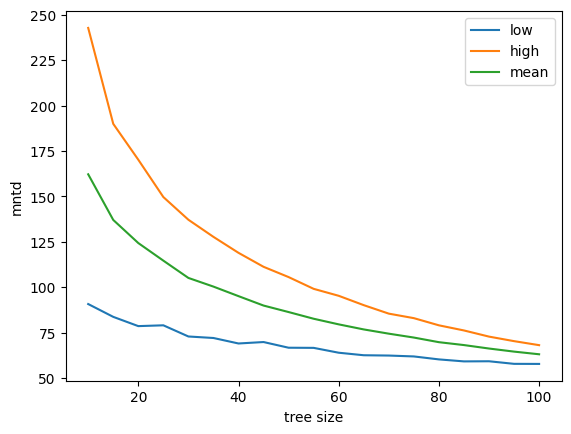

In [20]:
#print(average_mpd_rnd)
plt.plot(tree_sizes, CI_mntd_bootstrap[0])
plt.plot(tree_sizes, CI_mntd_bootstrap[1])
plt.plot(tree_sizes,CI_mntd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mnpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mntd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mntd')
plt.legend(labels2)
plt.savefig(os.path.join(save_directory, 'mntd_95CI.jpg'), dpi=1200)


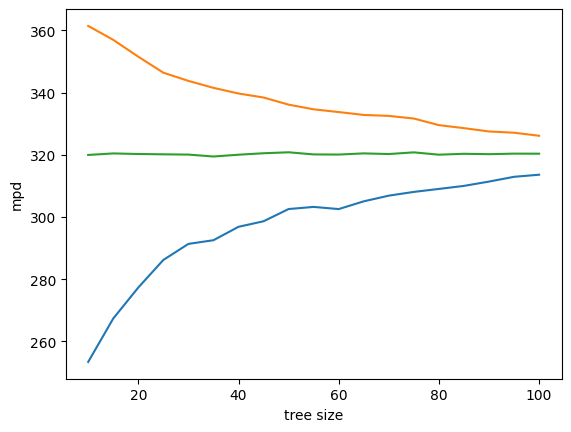

In [21]:
plt.plot(tree_sizes, CI_mpd_bootstrap[0])
plt.plot(tree_sizes, CI_mpd_bootstrap[1])
plt.plot(tree_sizes,CI_mpd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mpd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.savefig(os.path.join(save_directory, 'mpd_95CI.jpg'), dpi=1200)


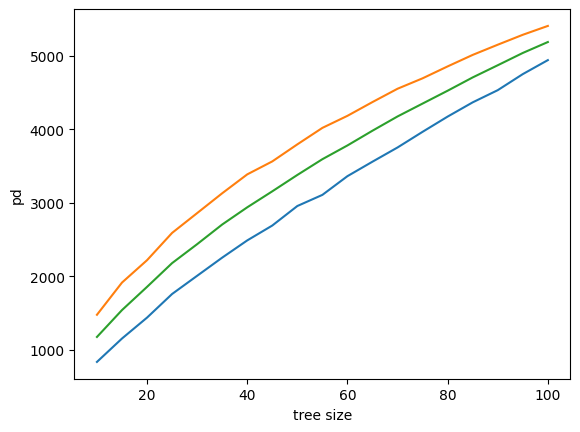

In [22]:
plt.plot(tree_sizes, CI_pd_bootstrap[0])
plt.plot(tree_sizes, CI_pd_bootstrap[1])
plt.plot(tree_sizes,CI_pd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
#plt.title('95% CI for expected [d] across tree sizes')
plt.xlabel('tree size')
plt.ylabel('pd')
plt.savefig(os.path.join(save_directory, 'pd_95CI.jpg'), dpi=1200)



In [60]:
CI_export_mpd = pd.DataFrame(CI_mpd_bootstrap)
CI_colnames = dict.keys(new_mpd)
CI_export_mpd.columns = CI_colnames
CI_export_mpd.index = ["Low", "High", "Mean"]
CI_export_mpd.to_csv(os.path.join(save_directory,"CI_mpd_output_bootstrap_bird.csv"))


In [61]:
CI_export_mntd = pd.DataFrame(CI_mntd_bootstrap)
CI_colnames = dict.keys(new_mntd)
CI_export_mntd.columns = CI_colnames
CI_export_mntd.index = ["Low", "High", "Mean"]
CI_export_mntd.to_csv(os.path.join(save_directory,"CI_mntd_output_bootstrap_bird.csv"))

In [62]:
CI_export_pd = pd.DataFrame(CI_pd_bootstrap)
CI_colnames = dict.keys(new_pd)
CI_export_pd.columns = CI_colnames
CI_export_pd.index = ["Low", "High", "Mean"]
CI_export_pd.to_csv(os.path.join(save_directory,"CI_pd_output_bootstrap_bird.csv"))